# Customer satisfaction prediction

## Dataset structure
| n    | Variable                      | Description                                                  |
| :--- | :---------------------------- | :----------------------------------------------------------- |
| 1    | id                            | Client ID                                                    |
| 2    | Gender                        | Client Gender                                                |
| 3    | Customer type                 | Client type: Premium or Standard                             |
| 4    | Age                           | Client Age                                                   |
| 5    | Price                         | Client Age                                                   |
| 6    | New/Used                      | Client Age                                                   |
| 7    | Category                      | Client Age                                                   |
| 8    | Product description accuracy  | Level of satisfaction on product description                 |
| 9    | Manufacturer stainability     | Level of satisfaction on the manufacturing sustainability process |
| 10   | Packaging quality             | Level of satisfaction on packaging                           |
| 11   | Additional options            | Level of satisfaction on extra options                       |
| 12   | Reviews and ratings           | Level of satisfaction on reviews and rating information      |
| 13   | Integrity of packaging        | Level of satisfaction on packaging state                     |
| 14   | Check-out procedure           | Level of satisfaction on payment procedure                   |
| 15   | Relevance of related products | Level of satisfaction on related product suggestion          |
| 16   | Costumer insurance            | Level of satisfaction on insurance options                   |
| 17   | Shipping delay in days        | Delay of shipping in days                                    |
| 18   | Arrival delay in days         | Arrival delay on days                                        |
| 19   | Satisfaction                  | Target: Satisfied, Not Satisfied                             |

In [1]:
# Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [2]:
df = pd.read_csv('../data/interim/model_cleaned.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  50000 non-null  object 
 1   Gender                              50000 non-null  object 
 2   Customer Type                       50000 non-null  object 
 3   Age                                 50000 non-null  float64
 4   Price                               50000 non-null  float64
 5   NewUsed                             50000 non-null  object 
 6   Category                            50000 non-null  object 
 7   Product description accuracy        50000 non-null  int64  
 8   Manufacturer sustainability         50000 non-null  int64  
 9   Packaging quality                   50000 non-null  int64  
 10  Additional options                  50000 non-null  int64  
 11  Helpfulness of reviews and ratings  50000

***
## Data exploration

In [3]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,id,Gender,Customer Type,NewUsed,Category
0,139Q880b,Female,Premium,New,Entertainment
1,513F768p,Female,Premium,New,Technology
2,933T167j,Female,Premium,New,Technology
3,193N829g,Male,Premium,New,Technology
4,661I898j,Male,Premium,New,Entertainment


In [4]:
df_numerical=df.select_dtypes(include=[np.number])
df_numerical.head()

,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,60.0,37.66,4,4,2,4,3,5,3,4,2,0,0,0
1,57.0,331.90,1,1,3,5,5,5,4,5,5,0,0,1
2,38.0,311.06,3,3,5,5,5,4,1,5,5,0,0,1
3,44.0,85.14,5,5,3,2,5,4,5,1,3,0,0,0
4,37.0,23.15,1,1,5,1,3,3,2,2,5,0,0,1


***
#### Categorical data

In [5]:
df_categorical.shape[1]
# But one of this is customer ID

5

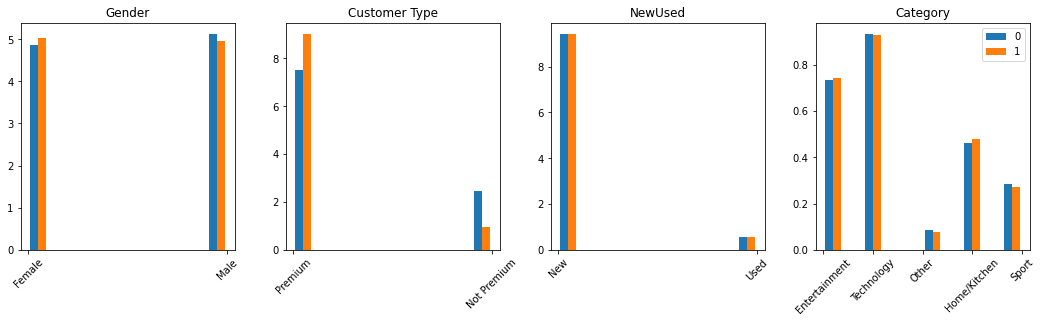

In [6]:
df_neg=df_categorical[df['Satisfaction']==0]
df_pos=df_categorical[df['Satisfaction']==1]


features = list(df_categorical.columns)
features.remove('id')

fig, axes = plt.subplots(1, 4,figsize=[15,4])

fig.tight_layout(pad=2)

for label, ax in zip(features, axes.flat):
    plt.sca(ax)
    plt.hist([df_neg[label],df_pos[label]],density=True, label=['0','1'])
    plt.title(label)
    plt.xticks(rotation = 45)
plt.legend()
plt.show()

>As we can see from charts above, feature 'NewUsed' is useless in order to discriminate between satisfied customers and not satisfied customers

In [22]:
selected_features=['Gender', 'Customer Type', 'Category']

In [23]:
# Create dummies for selected features
dummies = pd.get_dummies(df_categorical[selected_features])
dummies.head()

,Gender_Female,Gender_Male,Customer Type_Not Premium,Customer Type_Premium,Category_Entertainment,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology
0,1,0,0,1,1,0,0,0,0
1,1,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1
4,0,1,0,1,1,0,0,0,0


In [25]:
dummies.shape

(50000, 9)

***
#### Numerical data

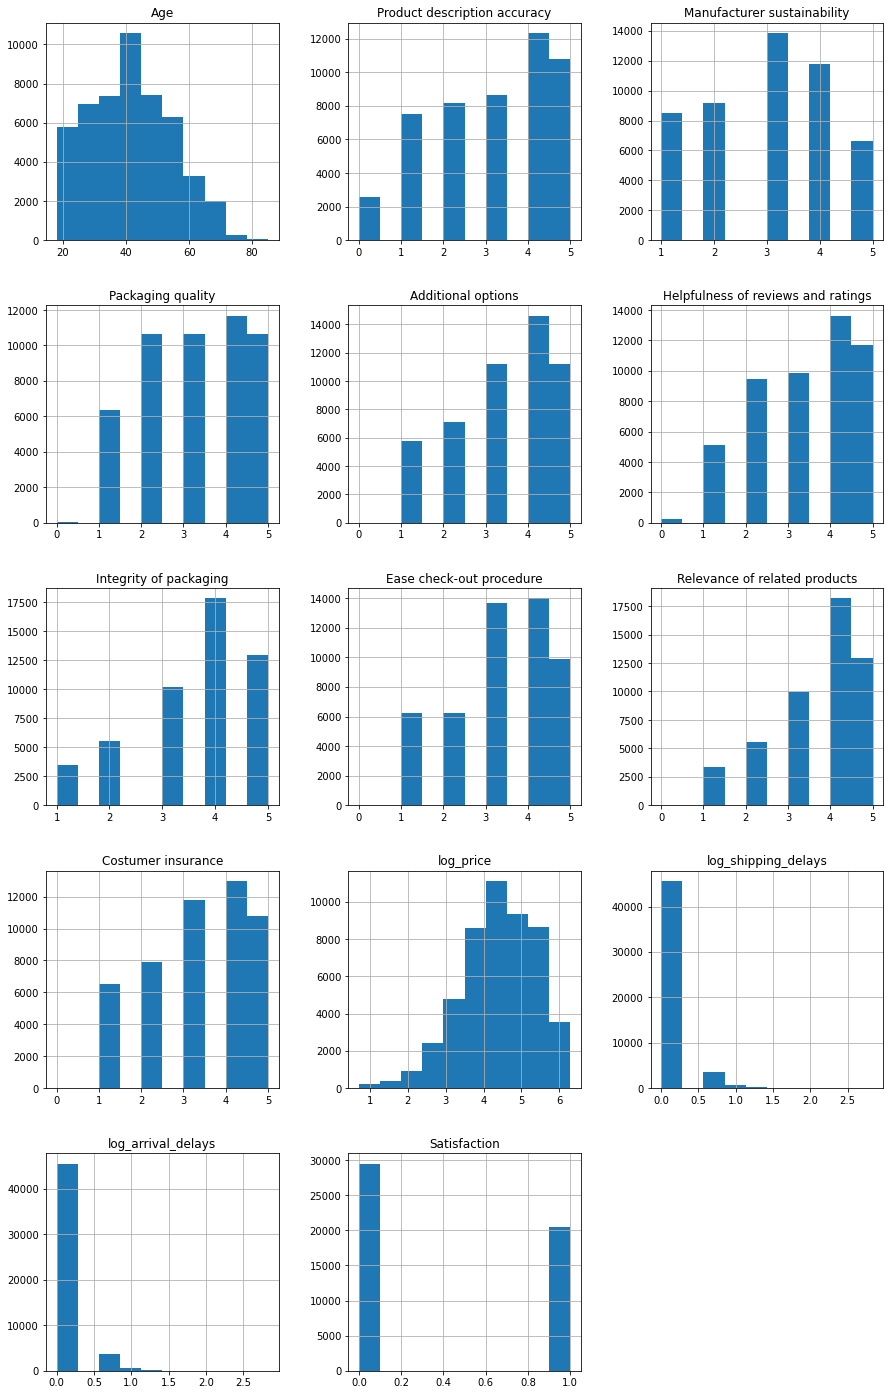

In [26]:
hist = df_numerical.hist(layout = (6,3), figsize = (15,30));

> Let's try with log trasformation for price, shipping delay in days and arrival delay in days.

In [11]:
import math
pd.options.mode.chained_assignment = None 

df_numerical['log_price']=df_numerical['Price'].apply(lambda x: math.log(x+1))
df_numerical['log_shipping_delays']=df_numerical['Shipping delay in days'].apply(lambda x: math.log(x+1))
df_numerical['log_arrival_delays']=df_numerical['Arrival delay in days'].apply(lambda x: math.log(x+1))

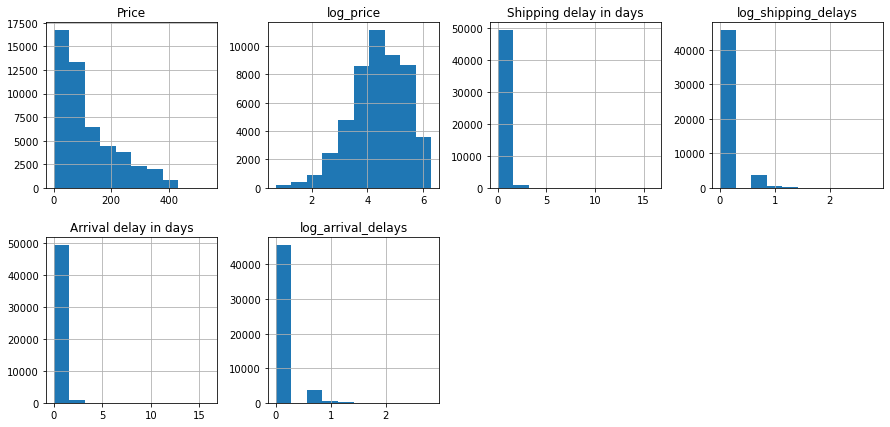

In [12]:
hist2 =df_numerical[['Price','log_price', 'Shipping delay in days','log_shipping_delays','Arrival delay in days','log_arrival_delays']].hist(layout=(2,4), figsize=(15,7))

In [13]:
df_numerical.columns

Index(['Age', 'Price', 'Product description accuracy',
       'Manufacturer sustainability', 'Packaging quality',
       'Additional options', 'Helpfulness of reviews and ratings',
       'Integrity of packaging', 'Ease check-out procedure',
       'Relevance of related products', 'Costumer insurance',
       'Shipping delay in days', 'Arrival delay in days', 'Satisfaction',
       'log_price', 'log_shipping_delays', 'log_arrival_delays'],
      dtype='object')

In [14]:
selected_num = ['Age', 'Product description accuracy',
       'Manufacturer sustainability', 'Packaging quality',
       'Additional options', 'Helpfulness of reviews and ratings',
       'Integrity of packaging', 'Ease check-out procedure',
       'Relevance of related products', 'Costumer insurance',
       'log_price', 'log_shipping_delays', 'log_arrival_delays', 'Satisfaction']
len(selected_num)

14

In [15]:
df_numerical = df_numerical[selected_num]

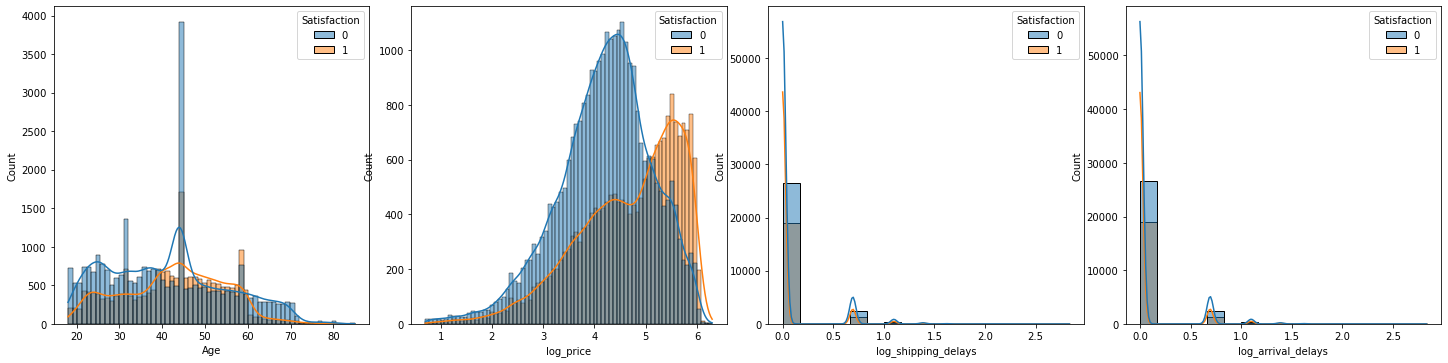

In [16]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20,5))
fig.tight_layout()

col = ['Age', 'log_price', 'log_shipping_delays', 'log_arrival_delays']
for label, ax in zip(col, axes.flat):
   sns.histplot( x = label, data = df_numerical, hue = 'Satisfaction', ax = ax, kde = True)
plt.show()

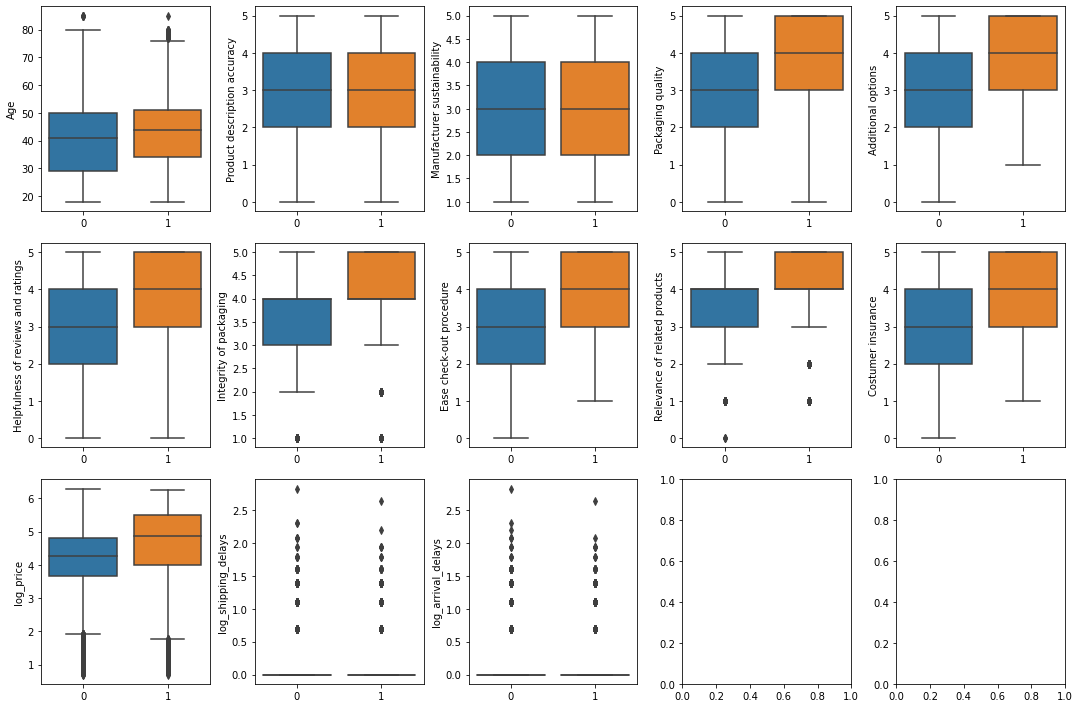

In [45]:
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(15,10))
fig.tight_layout()

columns = list(df_numerical.columns)
columns.remove('Satisfaction')

for col, ax in zip(columns, axes.flat):
    sns.boxplot( x = 'Satisfaction', y = col, data = df_numerical, ax = ax)
    ax.set_xlabel('')

<div class='alert alert-info'>As we could have expected, costumers' satisfaction is higher with high reviewed shopping insertions.</div>

***
#### Standardize numerical data

In [30]:
selection = list(df_numerical.columns)
selection.remove('Satisfaction')

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_numerical[selection])

StandardScaler()

In [34]:
# Save the scaler
import joblib
scaler_filename = "../models/standard_scaler.save"
joblib.dump(scaler, scaler_filename) 

['../models/standard_scaler.save']

In [39]:
df_scaled = pd.DataFrame(scaler.transform(df_numerical[selection]))
df_scaled.columns = df_numerical[selection].columns

In [40]:
df_scaled

,Age,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,log_price,log_shipping_delays,log_arrival_delays
0,1.405169,0.614787,0.800233,-0.893004,0.491497,-0.254818,1.167069,-0.237282,0.312945,-0.966122,-0.751938,-0.297669,-0.300491
1,1.175338,-1.349641,-1.548603,-0.142870,1.267095,1.264399,1.167069,0.552238,1.163755,1.314009,1.452823,-0.297669,-0.300491
2,-0.280257,-0.040022,0.017287,1.357397,1.267095,1.264399,0.320533,-1.816323,1.163755,1.314009,1.386623,-0.297669,-0.300491
3,0.179404,1.269597,1.583178,-0.142870,-1.059700,1.264399,0.320533,1.341758,-2.239485,-0.206078,0.068477,-0.297669,-0.300491
4,-0.356868,-1.349641,-1.548603,1.357397,-1.835298,-0.254818,-0.526004,-1.026803,-1.388675,1.314009,-1.233763,-0.297669,-0.300491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.433478,-1.349641,0.017287,-1.643137,-1.835298,-1.774035,-2.219077,-1.026803,-0.537865,-0.966122,0.274531,-0.297669,-0.300491
49996,-1.506022,-0.040022,0.800233,-0.142870,-1.835298,-1.014427,0.320533,-1.026803,0.312945,-0.206078,-0.462856,-0.297669,-0.300491
49997,-1.506022,-0.040022,0.017287,1.357397,0.491497,-0.254818,-0.526004,-1.026803,-0.537865,1.314009,-0.004689,-0.297669,-0.300491
49998,-0.433478,-0.040022,0.800233,0.607263,-0.284102,-1.014427,0.320533,-0.237282,0.312945,0.553965,-0.575709,2.701560,2.671817


In [43]:
df_processed = pd.concat([dummies, df_scaled, df_numerical[['Satisfaction']]], axis = 1)
df_processed.to_csv('../data/processed/models_processed.csv')

In [44]:
df_processed

,Gender_Female,Gender_Male,Customer Type_Not Premium,Customer Type_Premium,Category_Entertainment,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology,Age,...,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,log_price,log_shipping_delays,log_arrival_delays,Satisfaction
0,1,0,0,1,1,0,0,0,0,1.405169,...,0.491497,-0.254818,1.167069,-0.237282,0.312945,-0.966122,-0.751938,-0.297669,-0.300491,0
1,1,0,0,1,0,0,0,0,1,1.175338,...,1.267095,1.264399,1.167069,0.552238,1.163755,1.314009,1.452823,-0.297669,-0.300491,1
2,1,0,0,1,0,0,0,0,1,-0.280257,...,1.267095,1.264399,0.320533,-1.816323,1.163755,1.314009,1.386623,-0.297669,-0.300491,1
3,0,1,0,1,0,0,0,0,1,0.179404,...,-1.059700,1.264399,0.320533,1.341758,-2.239485,-0.206078,0.068477,-0.297669,-0.300491,0
4,0,1,0,1,1,0,0,0,0,-0.356868,...,-1.835298,-0.254818,-0.526004,-1.026803,-1.388675,1.314009,-1.233763,-0.297669,-0.300491,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,1,0,1,0,0,0,-0.433478,...,-1.835298,-1.774035,-2.219077,-1.026803,-0.537865,-0.966122,0.274531,-0.297669,-0.300491,0
49996,1,0,0,1,0,0,0,0,1,-1.506022,...,-1.835298,-1.014427,0.320533,-1.026803,0.312945,-0.206078,-0.462856,-0.297669,-0.300491,0
49997,0,1,0,1,0,1,0,0,0,-1.506022,...,0.491497,-0.254818,-0.526004,-1.026803,-0.537865,1.314009,-0.004689,-0.297669,-0.300491,0
49998,0,1,0,1,1,0,0,0,0,-0.433478,...,-0.284102,-1.014427,0.320533,-0.237282,0.312945,0.553965,-0.575709,2.701560,2.671817,0


<div class='alert alert-success'>Succesfully saved processed data, ready to train models.</div>

>**Note:** maybe PCA for ordinal features to make some features reduction?